# Explore here

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import *
from imblearn.metrics import specificity_score
import requests
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pickle import dump
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_recall_fscore_support
import re
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, davies_bouldin_score
from lazypredict.Supervised import LazyRegressor

In [3]:
'''
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
response = requests.get(url).content.decode('utf-8')

file_name = '../data/raw/housing.csv'

with open(file_name, 'w') as temp_file:
    temp_file.writelines(response)
'''

'\nurl = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"\nresponse = requests.get(url).content.decode(\'utf-8\')\n\nfile_name = \'../data/raw/housing.csv\'\n\nwith open(file_name, \'w\') as temp_file:\n    temp_file.writelines(response)\n'

In [4]:
file_name = '../data/raw/housing.csv'
df = pd.read_csv(file_name)
pd.set_option('display.max_columns', None)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.33,41.00,6.98,1.02,322.00,2.56,37.88,-122.23,4.53
1,8.30,21.00,6.24,0.97,2401.00,2.11,37.86,-122.22,3.58
2,7.26,52.00,8.29,1.07,496.00,2.80,37.85,-122.24,3.52
3,5.64,52.00,5.82,1.07,558.00,2.55,37.85,-122.25,3.41
4,3.85,52.00,6.28,1.08,565.00,2.18,37.85,-122.25,3.42


In [5]:
df.drop(['HouseAge','AveRooms','AveBedrms','Population','AveOccup','MedHouseVal'], axis=1, inplace=True)
df.head()

,MedInc,Latitude,Longitude
0,8.33,37.88,-122.23
1,8.30,37.86,-122.22
2,7.26,37.85,-122.24
3,5.64,37.85,-122.25
4,3.85,37.85,-122.25


In [6]:
X = df

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

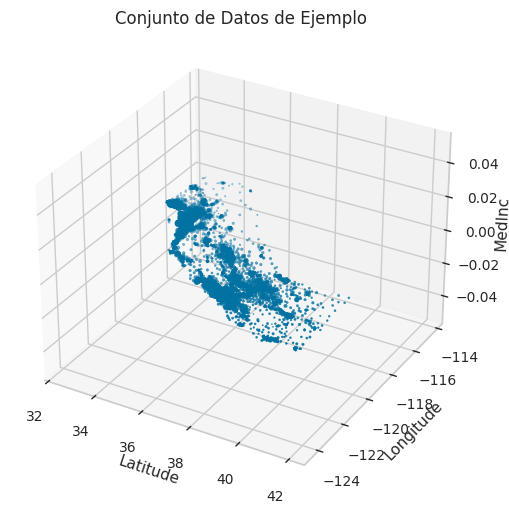

In [7]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('MedInc')
plt.scatter(X['Latitude'], X['Longitude'], X['MedInc'])
plt.title('Conjunto de Datos de Ejemplo')
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

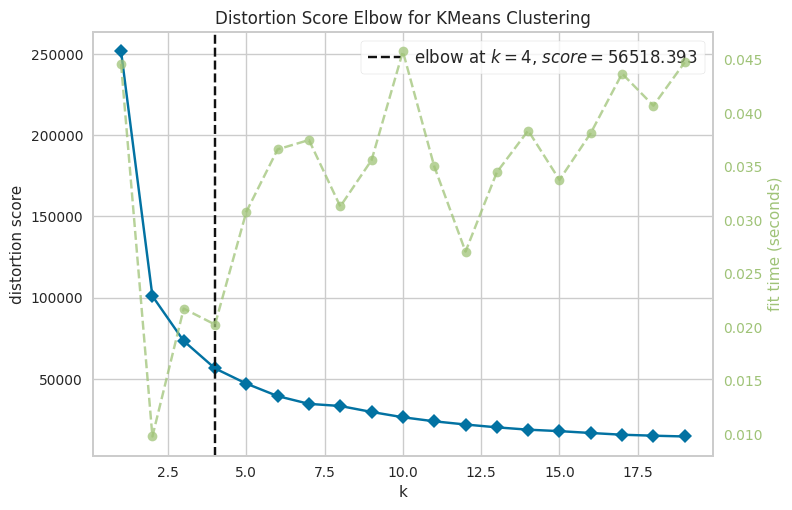

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
# Clase KElbowVisualizer para visualizar el codo
elbow_vis = KElbowVisualizer(KMeans(random_state=42), k=(1, 20))
elbow_vis.fit(X)
elbow_vis.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

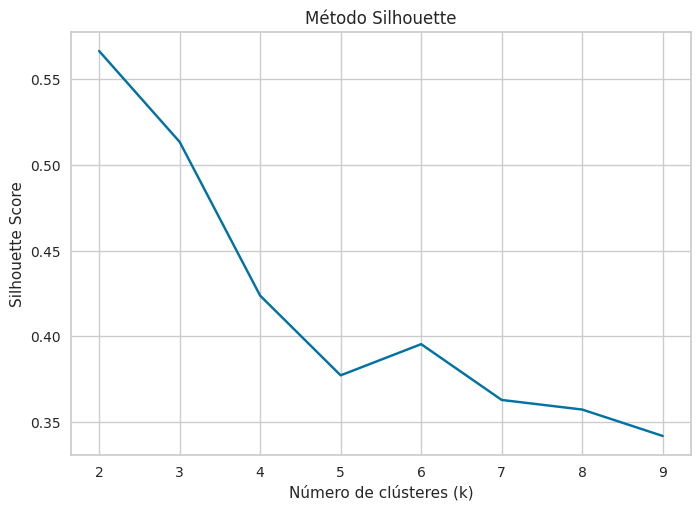

In [9]:
# Definir el rango de número de clústeres para probar
k_values = range(2, 10)

# Inicializar listas para almacenar los valores de silhouette para cada número de clústeres
silhouette_scores = []

# Probar diferentes valores de k
for k in k_values:
  cluster_labels = KMeans(n_clusters=k, random_state=42).fit_predict(X)
  silhouette_scores.append(silhouette_score(X, cluster_labels))

plt.plot(k_values, silhouette_scores)
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Silhouette Score')
plt.title('Método Silhouette')
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

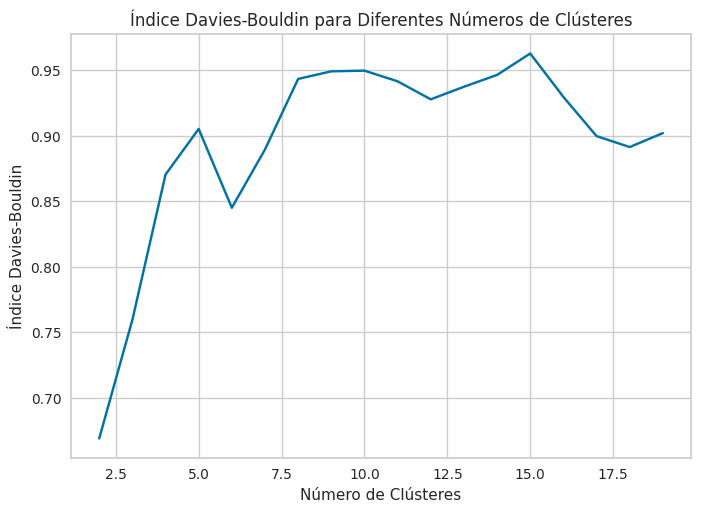

In [10]:
num_clusters = range(2, 20)
db_scores = []

# Probar diferentes valores de k
for k in num_clusters:
    cluster_labels = KMeans(n_clusters=k, random_state=42).fit_predict(X)
    db_scores.append(davies_bouldin_score(X, cluster_labels))

plt.plot(num_clusters, db_scores)
plt.title('Índice Davies-Bouldin para Diferentes Números de Clústeres')
plt.xlabel('Número de Clústeres')
plt.ylabel('Índice Davies-Bouldin')
plt.show()

Según los métodos de silhouette_scores y el de davies_bouldin_score, el número de clusters es de 2, sin embargo, según el método del codo giraría en torno a 4, así que elijo como número de clústeres 2, por mayoría de algoritmos (dos contra uno) y porque vimos en clase que el método del codo no es siempre el más acertado.
He probado a simular con menos números de clusters, pero una de las funciones no permite menos de 1 cluster y otra menos de dos, lo cual tiene sentido porque si no tenemos clústers, o solo tenemos uno, no hay predicción que hacer porque no hay diferencias en los datos, ya que todos pertenecerían al mismo.

In [11]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [12]:
model = KMeans(n_clusters = 2, random_state = 42)
model.fit(X_train)

KMeans(n_clusters=2, random_state=42)

In [13]:
# Realizar predicciones en el conjunto de prueba
predictions  = model.predict(X_test)


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

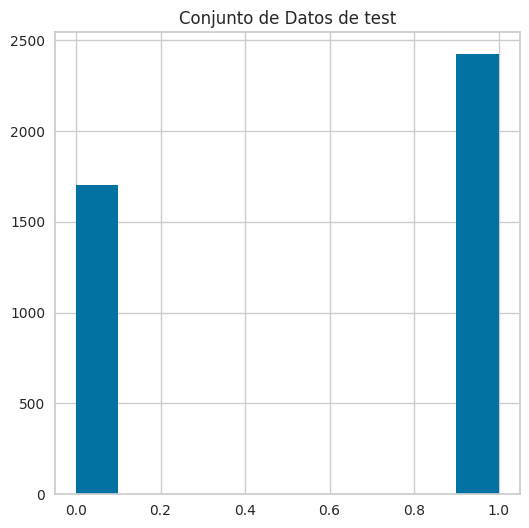

In [14]:
# Mostramos las predicciones de los datos de test
fig = plt.figure(figsize=(6, 6))
plt.hist(predictions)
plt.title('Conjunto de Datos de test')
plt.show()

In [15]:
X1 = df[['Latitude','Longitude']]
y1 = df['MedInc']

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

: 

In [ ]:
# Selección del algoritmo de regresión
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
scores, predictions = reg.fit(X_train, X_test, y_train, y_test)

 21%|██▏       | 9/42 [00:01<00:08,  3.98it/s]